# Leveraging Data to become a Real Estate Mogul

### Brief Dataset Description

It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### Notes on Specific Variables 

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped number of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import datetime
%matplotlib inline

### Importing Data

##### Data downloaded from: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?datasetId=2709

In [2]:
df = pd.read_csv('melb_data.csv')

### Pandas Profiling Report

In [3]:
profile = ProfileReport(df, title="Profiling Report")

In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Filling null values in Car column

In [5]:
df['Car'].fillna(np.floor(df['Car'].mean()), inplace=True)

### KDE of price

<AxesSubplot:xlabel='Price', ylabel='Density'>

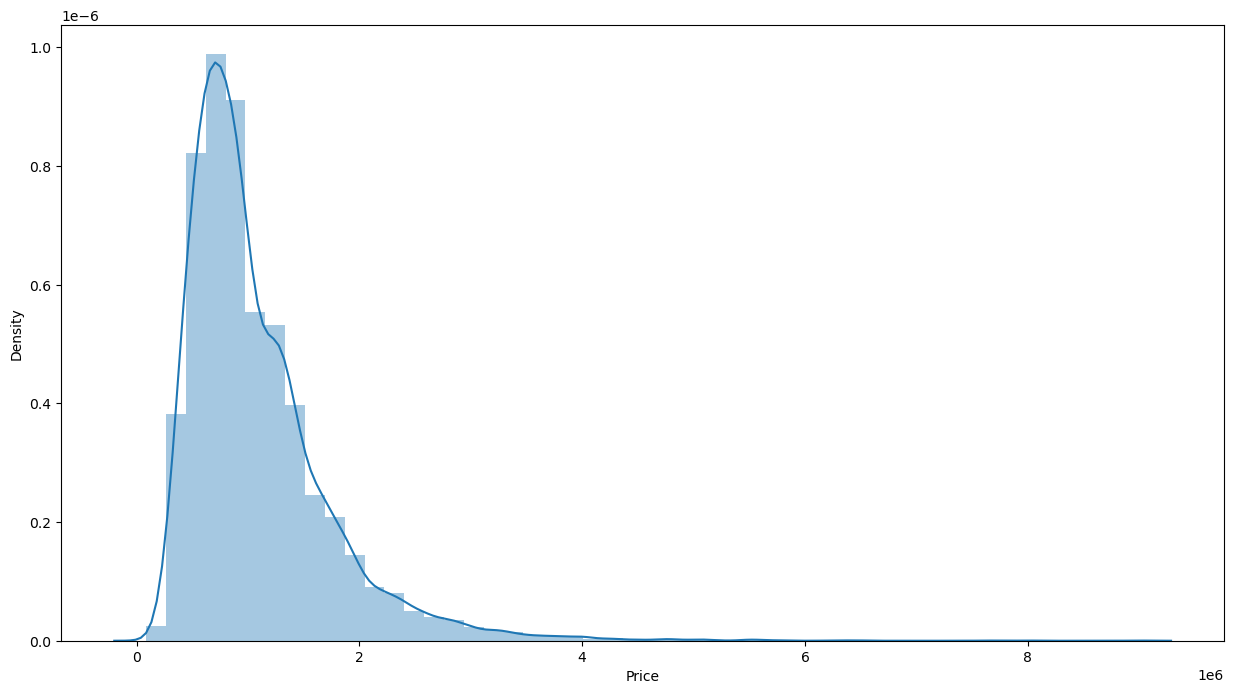

In [6]:
plt.figure(figsize=(15, 8))
sns.distplot(df['Price'], hist=True)

### KDE of Distance (CBD)

<AxesSubplot:xlabel='Distance', ylabel='Density'>

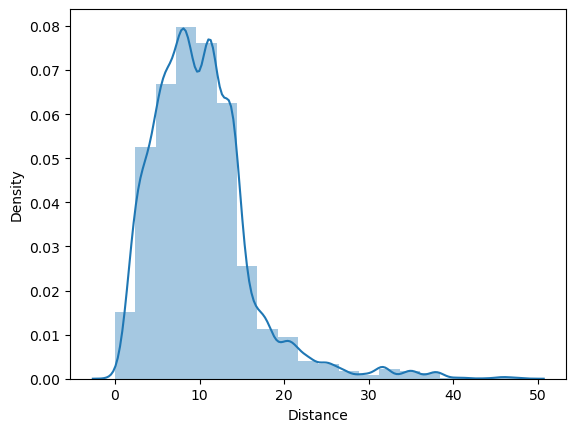

In [7]:
sns.distplot(df['Distance'], bins=20, hist=True)

### Count of house types

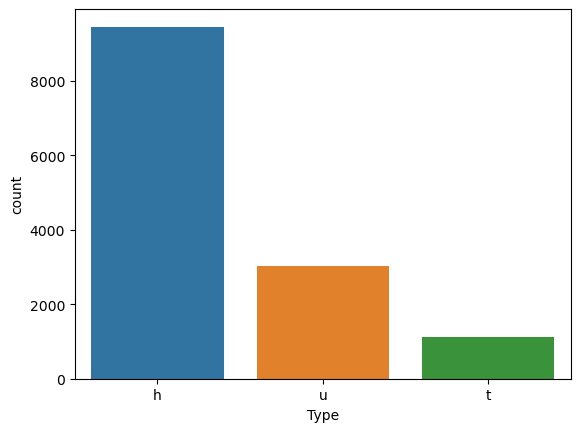

In [8]:
sns.countplot(df['Type'])
plt.show()

### Count of houses by region

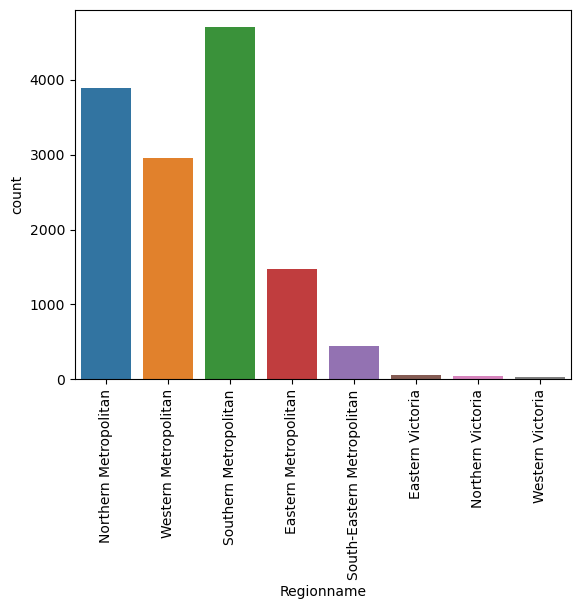

In [9]:
sns.countplot(df['Regionname'])
plt.xticks(rotation=90)
plt.show()

### Scatterplot between distance and price to analyse correlation

<AxesSubplot:xlabel='Distance', ylabel='Price'>

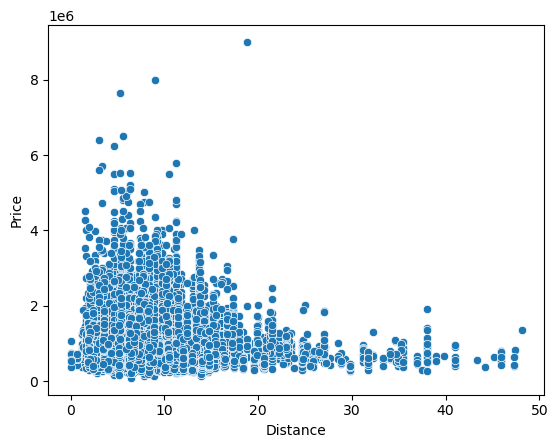

In [11]:
sns.scatterplot(x=df['Distance'], y=df['Price'])

### Geographical plot for distance and price

In [12]:
fig = px.density_mapbox(df, lat=df['Lattitude'], lon=df['Longtitude'], z=df['Price'],
                        center=dict(lat=-37.823002, lon=144.998001), zoom=9,
                        mapbox_style="stamen-terrain",
                        radius=20,
                        opacity=0.5)
fig.show()

### Correlation heatmap to detect multicollinearity in data

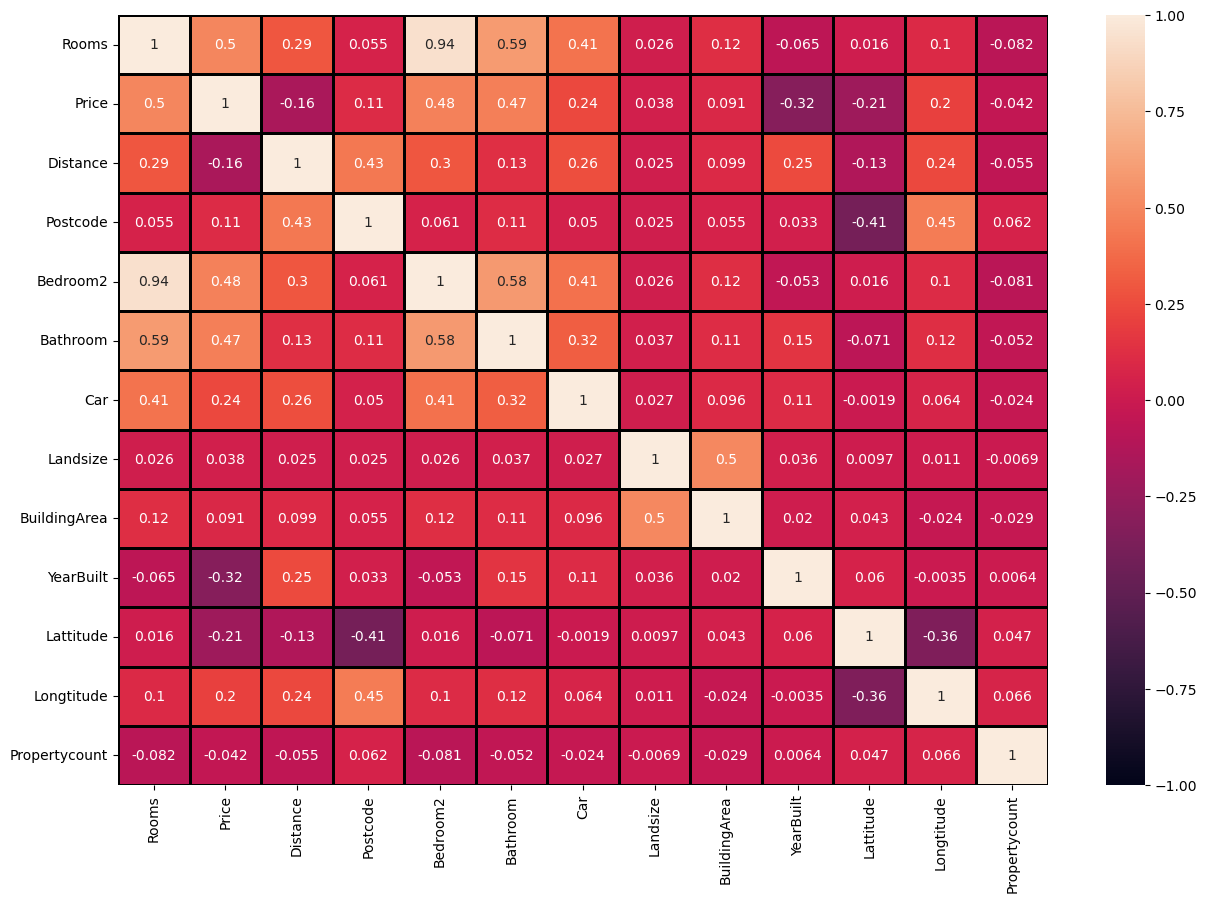

In [15]:
plt.figure(figsize=(15,10))
correlation = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')

### Box plot of Region vs Price

<AxesSubplot:xlabel='Price', ylabel='Regionname'>

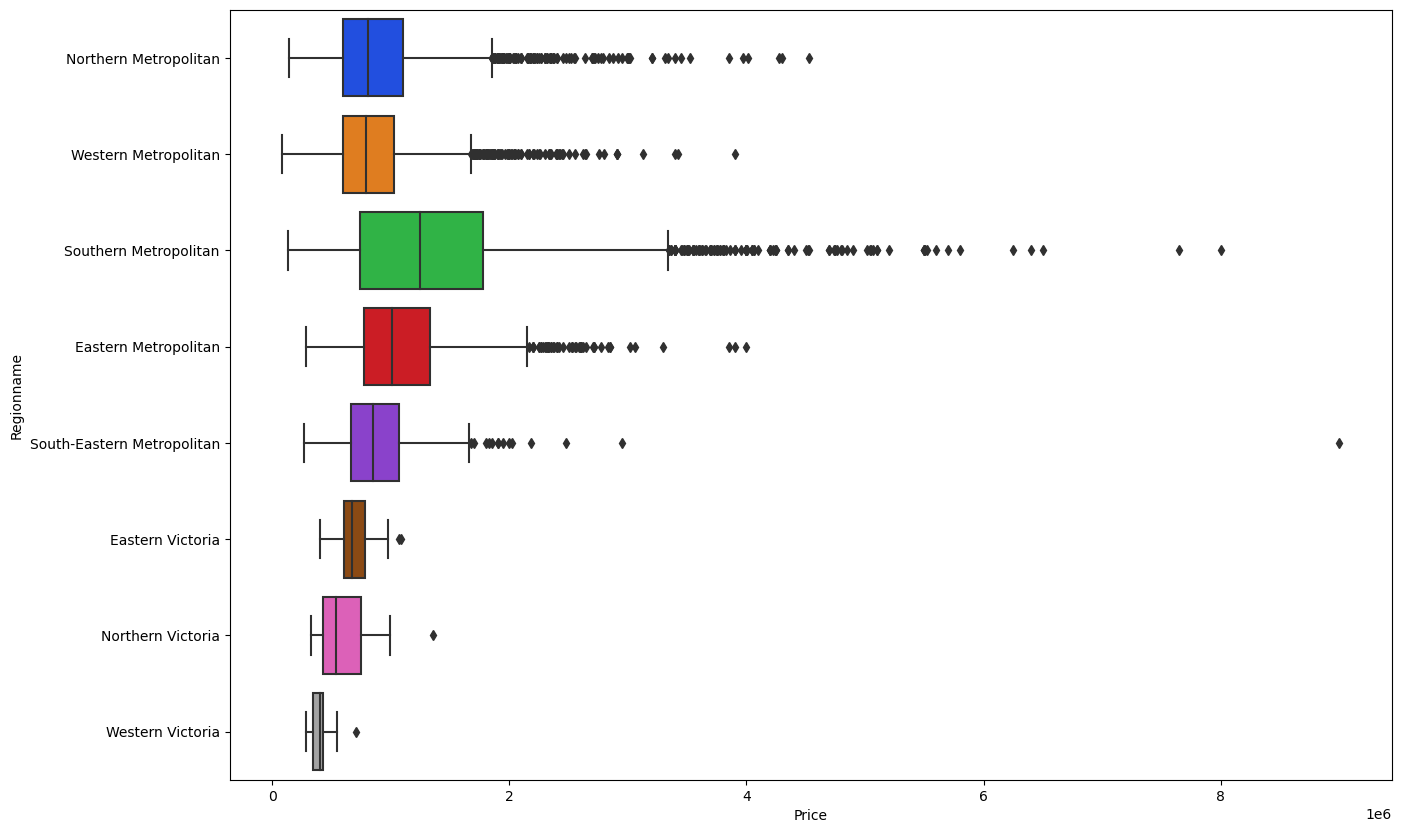

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(y=df['Regionname'],x=df['Price'],palette="bright")

### Bar plot of Region with house type

<AxesSubplot:xlabel='Price', ylabel='Regionname'>

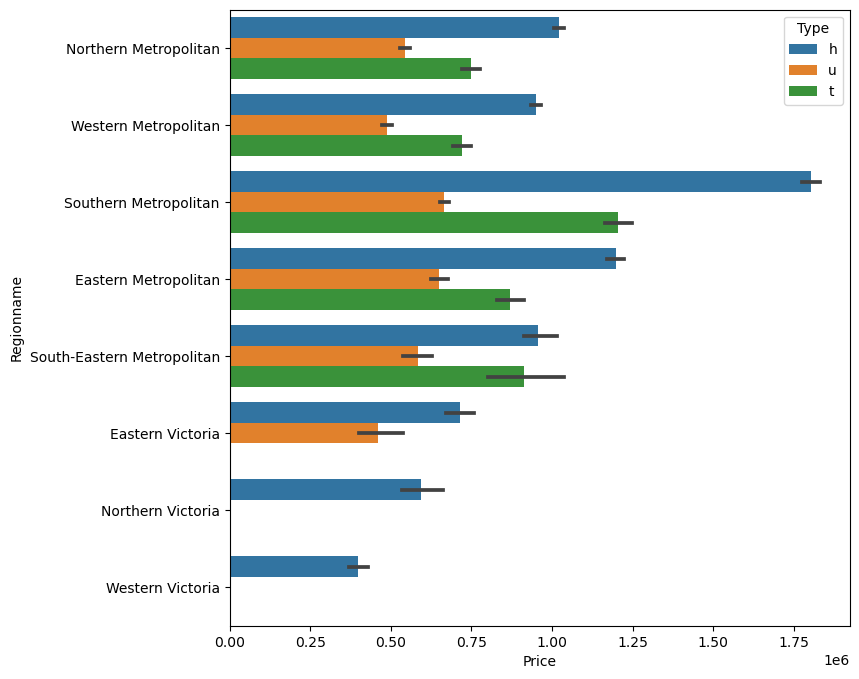

In [20]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Price'],y=df['Regionname'],hue=df['Type'])

### Analysis of Price with Bedroom2, Bathroom, Rooms

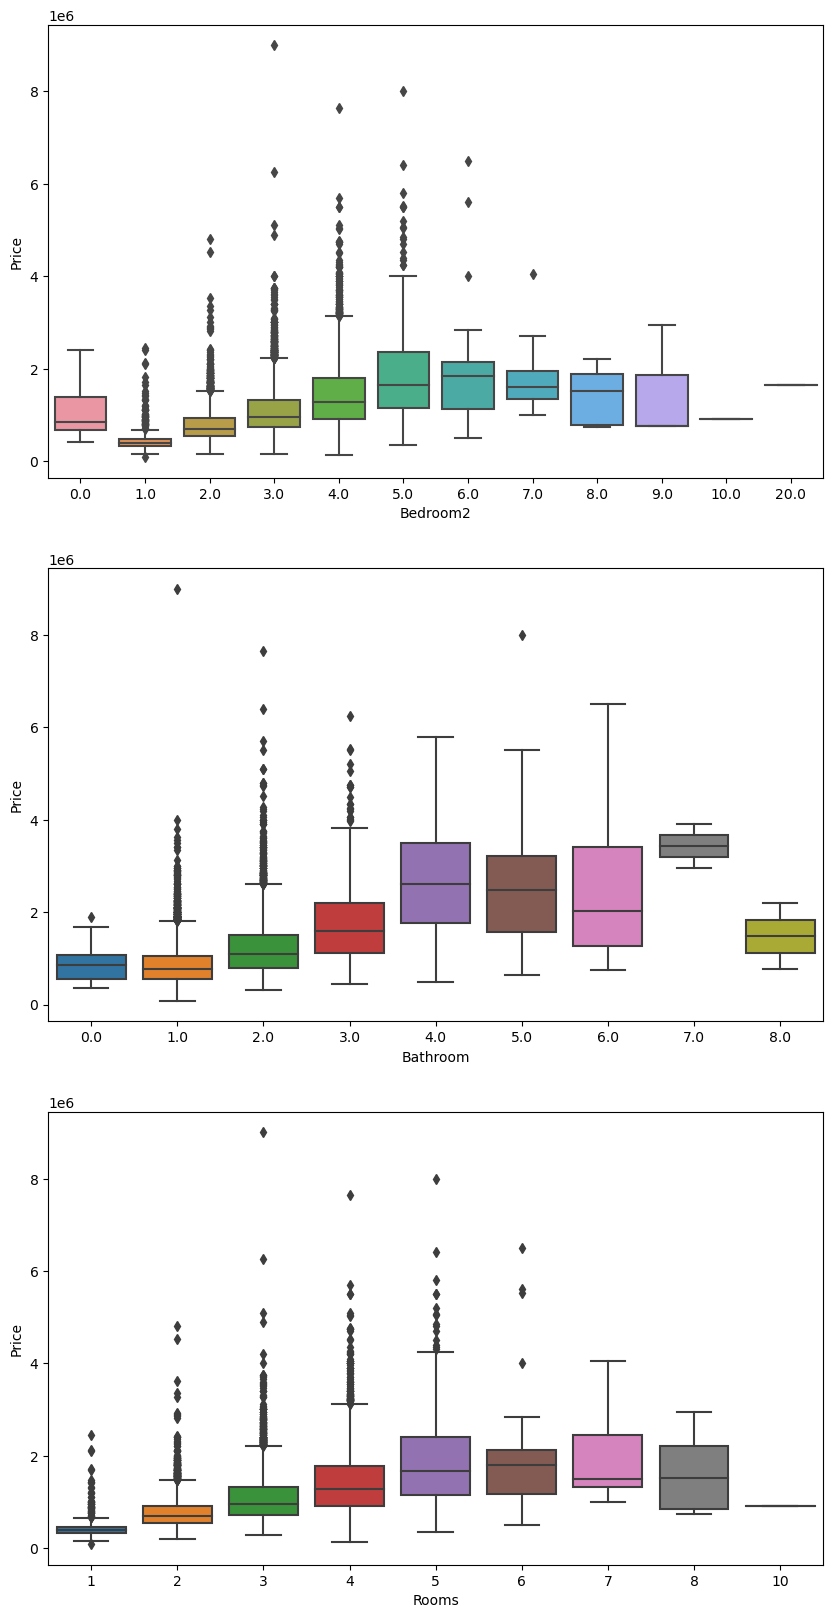

In [22]:
room_feature=['Bedroom2','Bathroom','Rooms']
plt.figure(figsize=(10,20))
i=1
for feature in room_feature:
    plt.subplot(3,1,i)
    sns.boxplot(x=df[feature],y=df['Price'])
    plt.xlabel(feature)
    i+=1